# Minimal Working Examples 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import ompy as om
import logging
from itertools import product

## Plotting a matrix and its projections

[0.5 1.5 2.5 3.5 4.5]


<IPython.core.display.Javascript object>


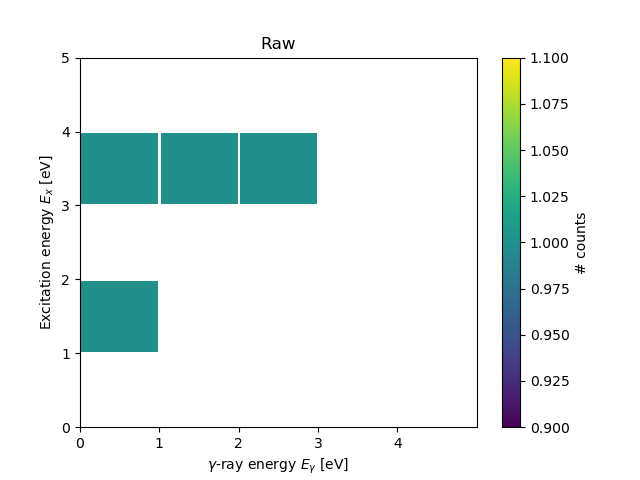

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1210cc0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1210cc0>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


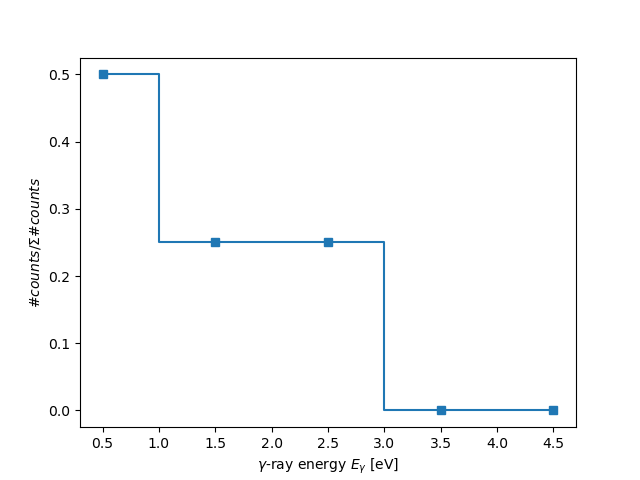

<IPython.core.display.Javascript object>


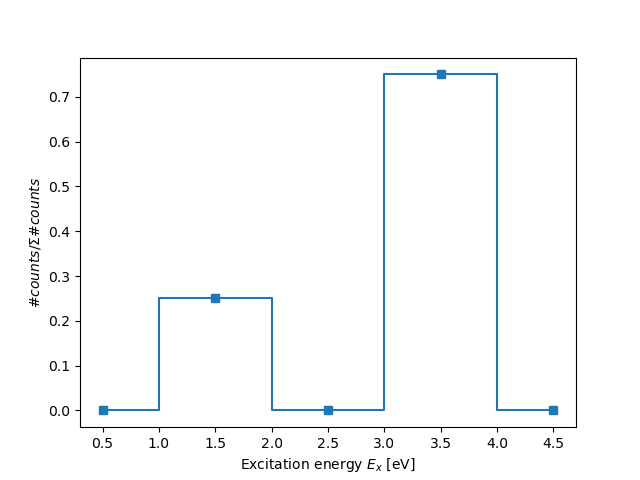

In [153]:
mat = om.disjoint_rows((5, 5))
print(mat.Ex)
mat.plot(scale='linear', edgecolor='white')
mat.plot_projection('Eg', normalize=True, marker='s')
mat.plot_projection('Ex', normalize=True, marker='s')

## Cutting a matrix

<IPython.core.display.Javascript object>


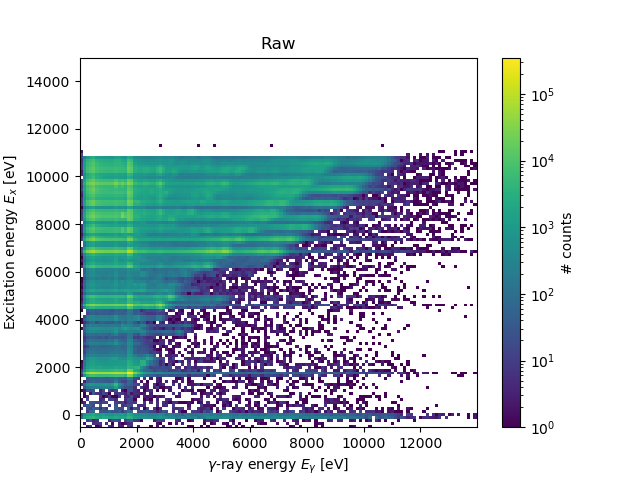

<IPython.core.display.Javascript object>


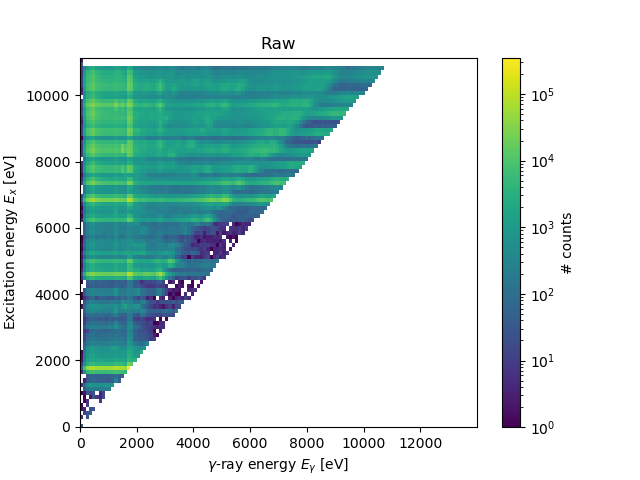

(<matplotlib.collections.QuadMesh at 0x7fdfcb115cf8>,
 <Figure size 640x480 with 2 Axes>)

In [3]:
simat = om.load_example_raw('Si28')
simat.plot()
simat.cut('Ex', Emin=0, Emax=11_000)
simba = simat.cut_diagonal(E1=[1,1], E2=[10000, 10000], inplace=False)
simba.plot()

<IPython.core.display.Javascript object>


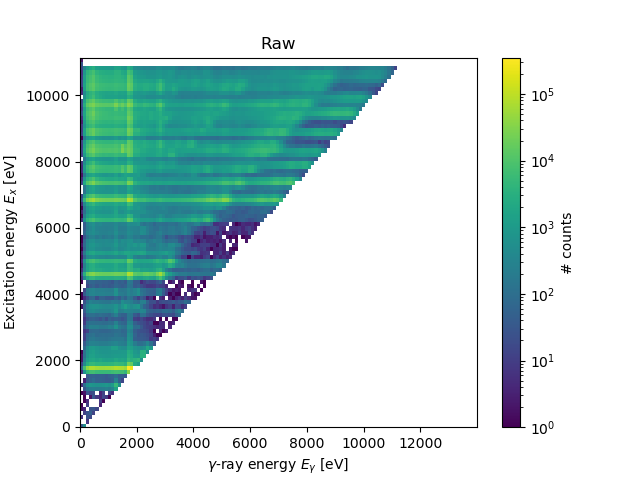

(<matplotlib.collections.QuadMesh at 0x7fdfcaff06a0>,
 <Figure size 640x480 with 2 Axes>)

In [4]:
simat.cut_diagonal()
simat.plot()

## Apply first generation method to a mock matrix 

## Applying first generation method

DEBUG:ompy.firstgeneration:Multiplicites:
┌─────────┬────────────────┐
│ Ex      │ Multiplicities │
╞═════════╪════════════════╡
│ 104.5   │ 0.4            │
├─────────┼────────────────┤
│ 228.5   │ 0.94           │
├─────────┼────────────────┤
│ 352.5   │ 1.2            │
├─────────┼────────────────┤
│ 476.5   │ 1.09           │
├─────────┼────────────────┤
│ 600.5   │ 1.28           │
├─────────┼────────────────┤
│ 724.5   │ 0.23           │
├─────────┼────────────────┤
│ 848.5   │ 1.22           │
├─────────┼────────────────┤
│ 972.5   │ 1.8            │
├─────────┼────────────────┤
│ 1096.5  │ 1.17           │
├─────────┼────────────────┤
│ 1220.5  │ 1.28           │
├─────────┼────────────────┤
│ 1344.5  │ 1.48           │
├─────────┼────────────────┤
│ 1468.5  │ 1.58           │
├─────────┼────────────────┤
│ 1592.5  │ 1.39           │
├─────────┼────────────────┤
│ 1716.5  │ 1.36           │
├─────────┼────────────────┤
│ 1840.5  │ 1.44           │
├─────────┼────────────────┤
│

<IPython.core.display.Javascript object>


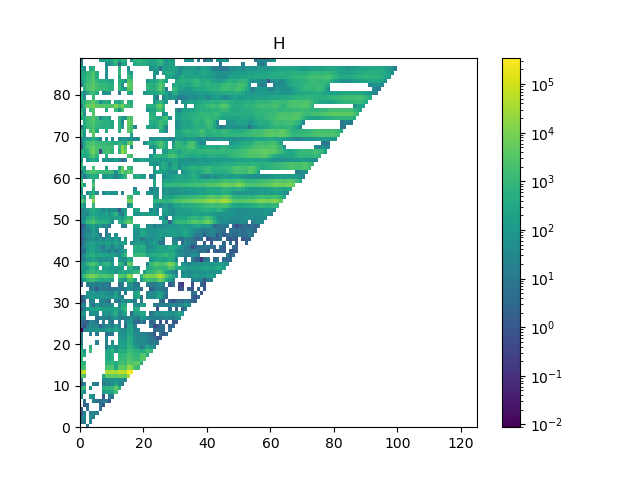

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7fe8f7a4f0f0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7fe8f7a4f0f0>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


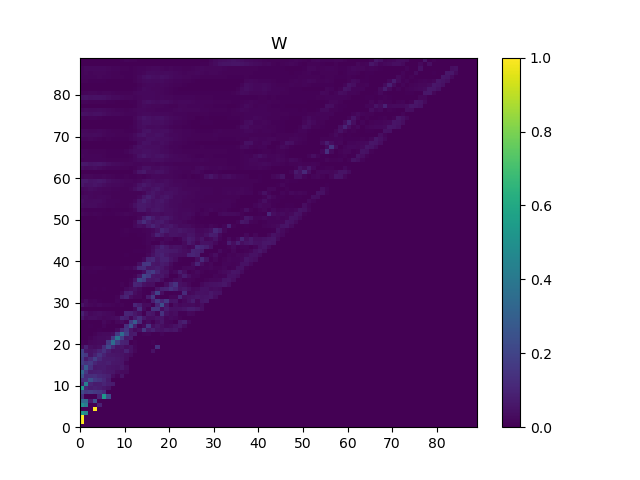

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f7f40160>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f7f40160>
DEBUG:matplotlib.colorbar:Setting pcolormesh
INFO:ompy.firstgeneration:iter 3/5: ε = 240418
INFO:ompy.firstgeneration:iter 4/5: ε = 115290
INFO:ompy.firstgeneration:iter 5/5: ε = 82614.7


<IPython.core.display.Javascript object>


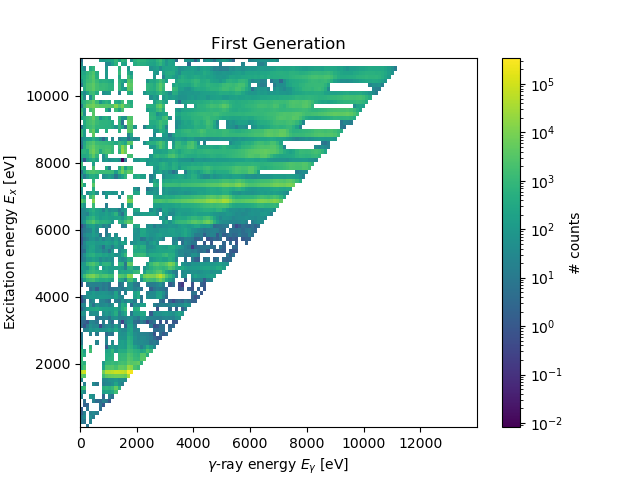

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7fe8f8264ba8>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7fe8f8264ba8>
DEBUG:matplotlib.colorbar:Setting pcolormesh


(<matplotlib.collections.QuadMesh at 0x7fe8f8244c88>,
 <Figure size 640x480 with 2 Axes>)

In [122]:
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger("ompy.firstgen")
logger.setLevel(logging.DEBUG)
no_table = lambda record: '┌' in record.GetMessage()
logger.addFilter(no_table) # :(


simat = om.load_example_raw('Si28')
simat.cut('Ex', Emin=0, Emax=11_000)
simat.cut_diagonal()

firstgen = om.FirstGeneration()
firstgen.num_iterations = 5
firstgen.multiplicity_estimation = 'total'
firstgen.use_slide = True
firstgen.step = om.plot_hook(firstgen.step, condition = lambda i: i == 2)
mat = firstgen.apply(simat)
mat.plot()

H.shape (89, 125)
A H slice: [[0.02631579 0.02631579 0.02631579 0.02631579 0.02631579 0.02631579
  0.02631579 0.02631579 0.02631579 0.02631579 0.02631579 0.02631579
  0.02631579 0.02631579 0.02631579]
 [0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
  0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
  0.02564103 0.02564103 0.02564103]]
[[0.33333333 0.33333333 0.33333333 ... 0.         0.         0.        ]
 [0.25       0.25       0.25       ... 0.         0.         0.        ]
 [0.2        0.2        0.2        ... 0.         0.         0.        ]
 ...
 [0.01       0.01       0.01       ... 0.01       0.01       0.01      ]
 [0.00980392 0.00980392 0.00980392 ... 0.00980392 0.00980392 0.00980392]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<IPython.core.display.Javascript object>


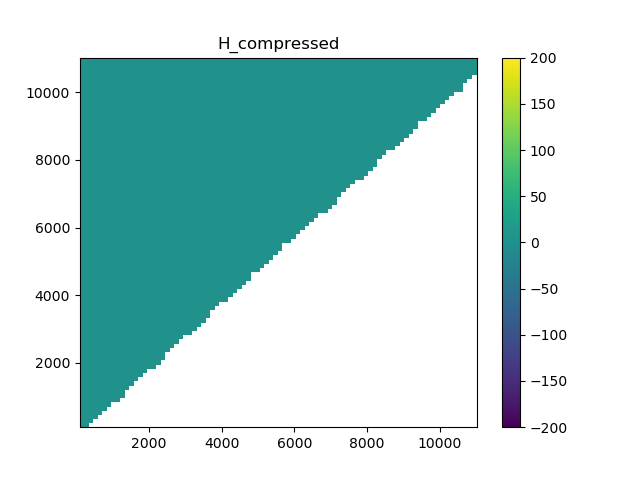

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f7744a90>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f7744a90>
DEBUG:matplotlib.colorbar:Setting pcolormesh


H_comp slice:  [[0.02913534 0.02913534 0.02913534 0.02913534 0.02913534 0.02913534
  0.02913534 0.02913534 0.02913534 0.02913534 0.02913534 0.02913534
  0.02913534 0.02913534 0.02913534]
 [0.02838828 0.02838828 0.02838828 0.02838828 0.02838828 0.02838828
  0.02838828 0.02838828 0.02838828 0.02838828 0.02838828 0.02838828
  0.02838828 0.02838828 0.02838828]]


<IPython.core.display.Javascript object>


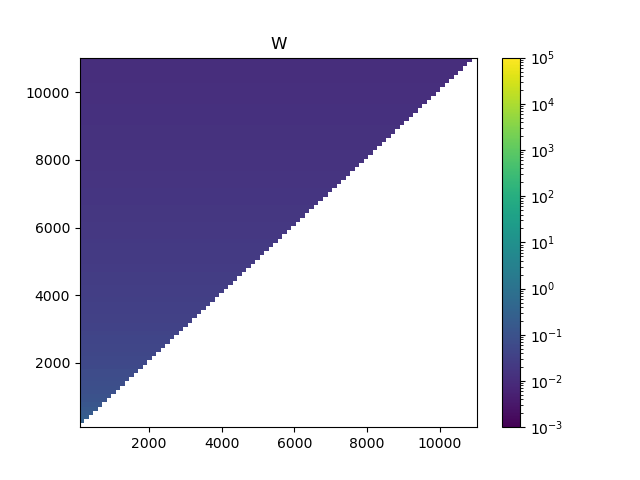

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7fe8f7957358>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7fe8f7957358>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


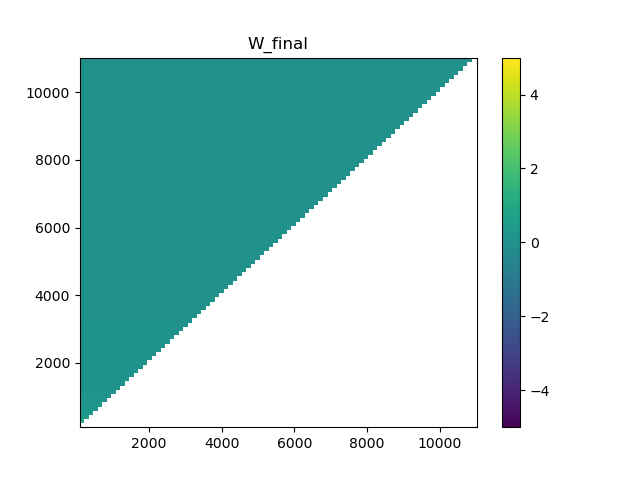

W_final slice:  [[0.03225806 0.03225806 0.03225806 0.03225806 0.03225806 0.03225806
  0.03225806 0.03225806 0.03225806 0.03225806 0.03225806 0.03225806
  0.03225806 0.03225806 0.03225806]
 [0.03125    0.03125    0.03125    0.03125    0.03125    0.03125
  0.03125    0.03125    0.03125    0.03125    0.03125    0.03125
  0.03125    0.03125    0.03125   ]]


DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f7437080>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f7437080>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


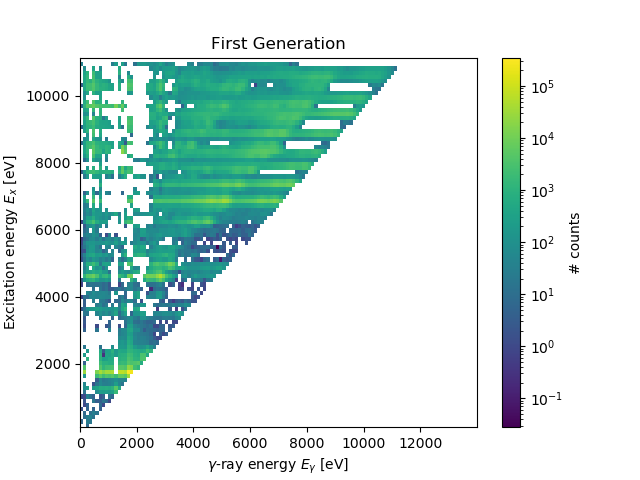

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7fe8f74afa90>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7fe8f74afa90>
DEBUG:matplotlib.colorbar:Setting pcolormesh


(<matplotlib.collections.QuadMesh at 0x7fe8f74d5048>,
 <Figure size 640x480 with 2 Axes>)

In [123]:
firstgen2 = om.first_generation_method(simat, Ex_max=11_000, dE_gamma=0, multiplicity_estimation='total',
                                      N_iterations=10)
firstgen2.plot()

<IPython.core.display.Javascript object>


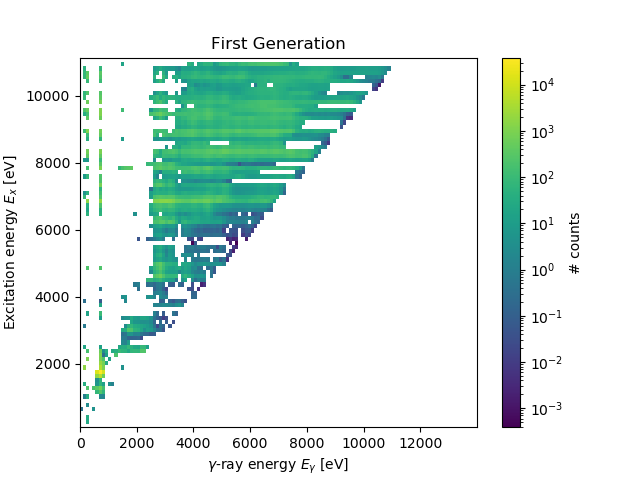

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7fe8f5936080>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7fe8f5936080>
DEBUG:matplotlib.colorbar:Setting pcolormesh


(<matplotlib.collections.QuadMesh at 0x7fe8f59679e8>,
 <Figure size 640x480 with 2 Axes>)

In [124]:
(firstgen2 - mat).plot(scale='log')

# Rebinning a matrix

In [ ]:
N = 10
#values = np.triu(np.random.randint(0, 10, size=(N, N))).T
values = np.triu(np.ones((N, N))).T
X = np.arange(1, N+1)
#X = np.arange(0, N)
#X = np.array([0.5, 1.5, 2.5, 3.5, 4.5])
mattis = om.Matrix(Ex=X, Eg=X, values=values)
mattis.plot(zscale='linear', edgecolors='white')

In [ ]:
mattis.rebin('Ex', factor=3)
mattis.plot(zscale='linear', edgecolor='white')
mattis.rebin('Eg', factor=3)
mattis.plot(zscale='linear', edgecolor='white')

  fig, ax = plt.subplots(1)



H.shape (20, 20)
A H slice: []
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.5        0.5        0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.33333333 0.33333333 0.33333333 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.25       0.25       0.25       0.25       0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.2        0.2        0.2        0.2        0.2        0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.   

<IPython.core.display.Javascript object>


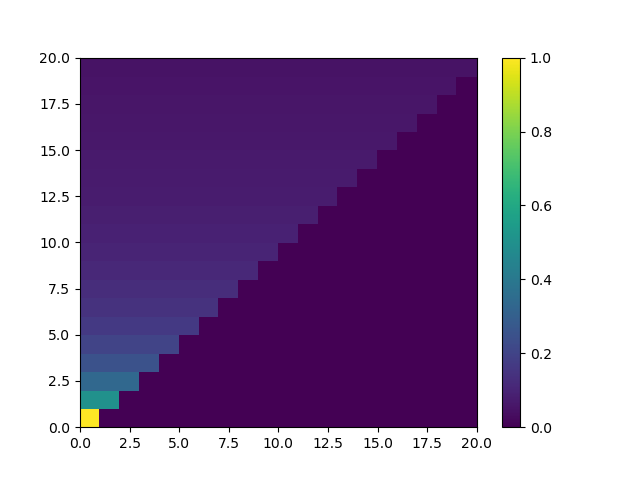

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f24bc0b8>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f24bc0b8>
DEBUG:matplotlib.colorbar:Setting pcolormesh
  print("H_comp slice: ", H_compressed[31:33,:15])



<IPython.core.display.Javascript object>


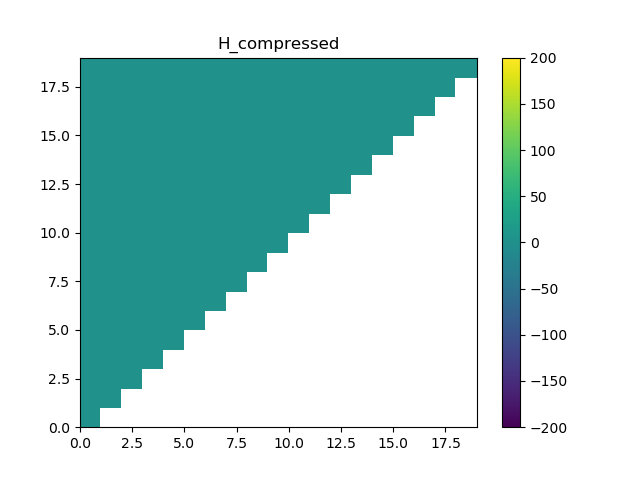

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f2542dd8>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f2542dd8>
DEBUG:matplotlib.colorbar:Setting pcolormesh
  lines = ax.pcolormesh(Ex_array, Ex_array, W,  norm=LogNorm(vmin=1e-3, vmax=1e5))



H_comp slice:  []


<IPython.core.display.Javascript object>


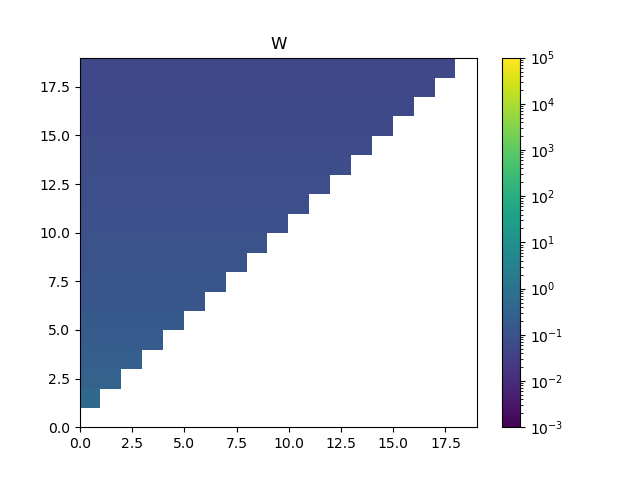

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7fe8f2470a58>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7fe8f2470a58>
DEBUG:matplotlib.colorbar:Setting pcolormesh
  print("W_final slice: ", W[31:33,:15])



<IPython.core.display.Javascript object>


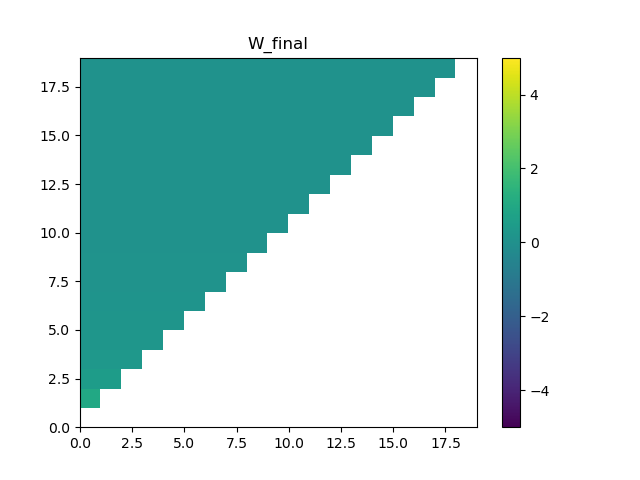

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f235b748>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f235b748>
DEBUG:matplotlib.colorbar:Setting pcolormesh


W_final slice:  []


<IPython.core.display.Javascript object>


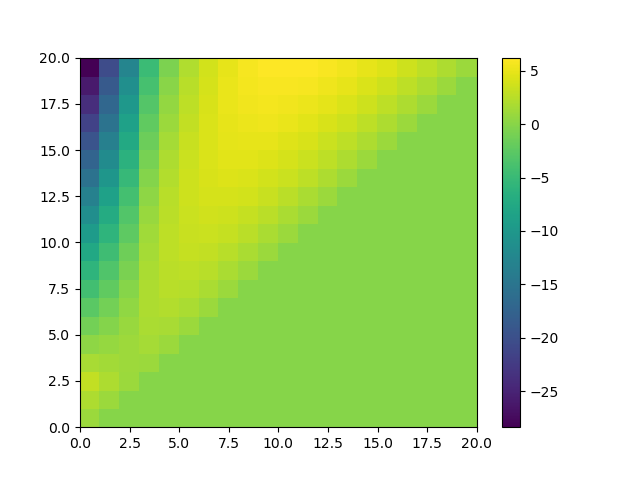

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f220d4a8>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f220d4a8>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


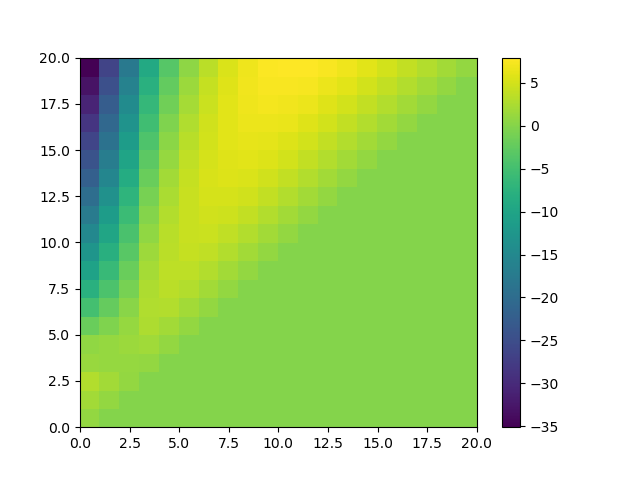

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f21900b8>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f21900b8>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


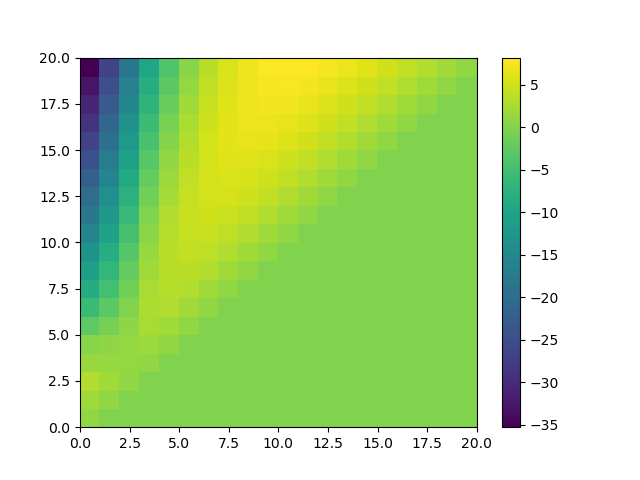

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f20b8940>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f20b8940>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


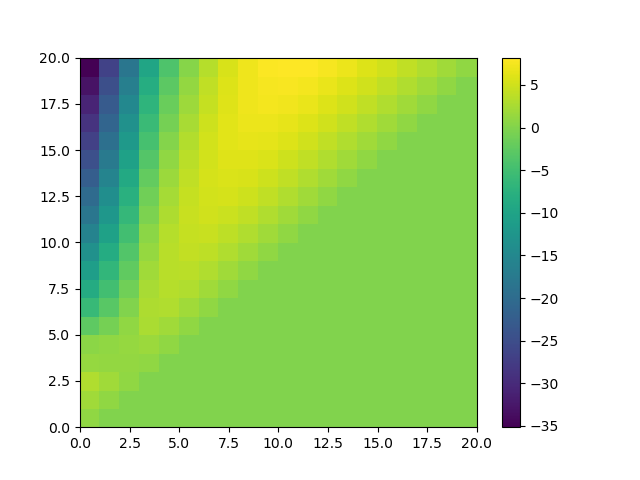

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1ff7438>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1ff7438>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


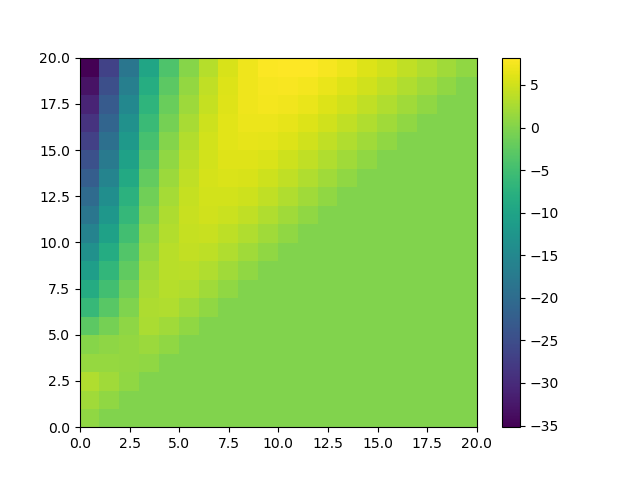

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1ff3240>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1ff3240>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


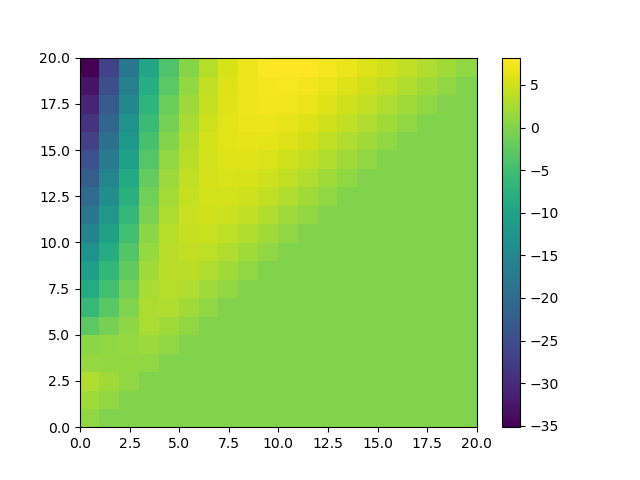

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1f61c88>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1f61c88>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


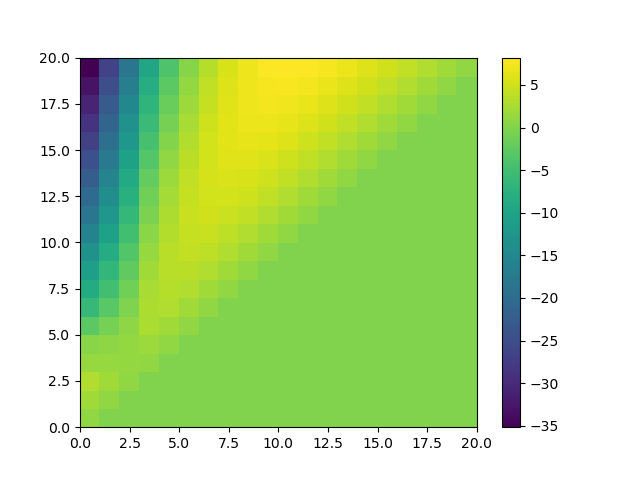

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1edd8d0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1edd8d0>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


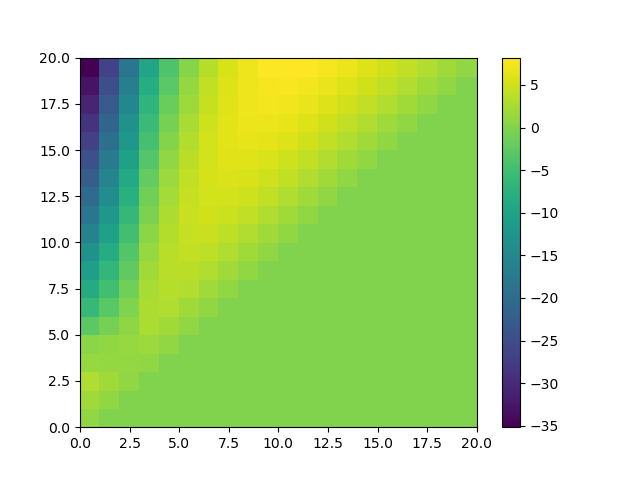

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1e576d8>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1e576d8>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


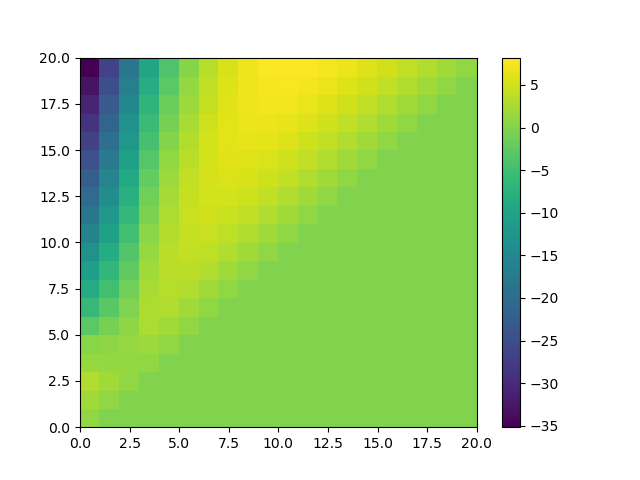

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1dda0f0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1dda0f0>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


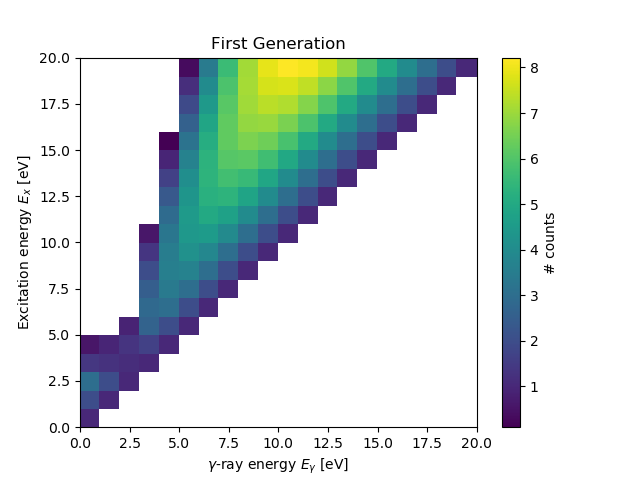

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1d43c18>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1d43c18>
DEBUG:matplotlib.colorbar:Setting pcolormesh


(<matplotlib.collections.QuadMesh at 0x7fe8f1d912b0>,
 <Figure size 640x480 with 2 Axes>)

In [146]:
firstgen = om.first_generation_method(allg, Ex_max=11_000, dE_gamma=0, multiplicity_estimation='total',
                                      N_iterations=10)
firstgen.plot()

DEBUG:ompy.firstgeneration:Multiplicites:
┌──────┬────────────────┐
│ Ex   │ Multiplicities │
╞══════╪════════════════╡
│ 0.0  │ 1.0            │
├──────┼────────────────┤
│ 1.0  │ 1.8            │
├──────┼────────────────┤
│ 2.0  │ 2.14           │
├──────┼────────────────┤
│ 3.0  │ 2.33           │
├──────┼────────────────┤
│ 4.0  │ 2.45           │
├──────┼────────────────┤
│ 5.0  │ 2.54           │
├──────┼────────────────┤
│ 6.0  │ 2.6            │
├──────┼────────────────┤
│ 7.0  │ 2.65           │
├──────┼────────────────┤
│ 8.0  │ 2.68           │
├──────┼────────────────┤
│ 9.0  │ 2.71           │
├──────┼────────────────┤
│ 10.0 │ 2.74           │
├──────┼────────────────┤
│ 11.0 │ 2.76           │
├──────┼────────────────┤
│ 12.0 │ 2.78           │
├──────┼────────────────┤
│ 13.0 │ 2.79           │
├──────┼────────────────┤
│ 14.0 │ 2.81           │
├──────┼────────────────┤
│ 15.0 │ 2.82           │
├──────┼────────────────┤
│ 16.0 │ 2.83           │
├──────┼──────────────

<IPython.core.display.Javascript object>


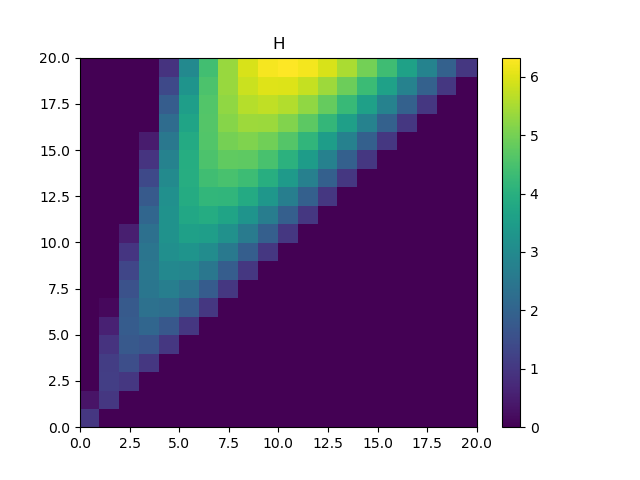

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4359128>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4359128>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


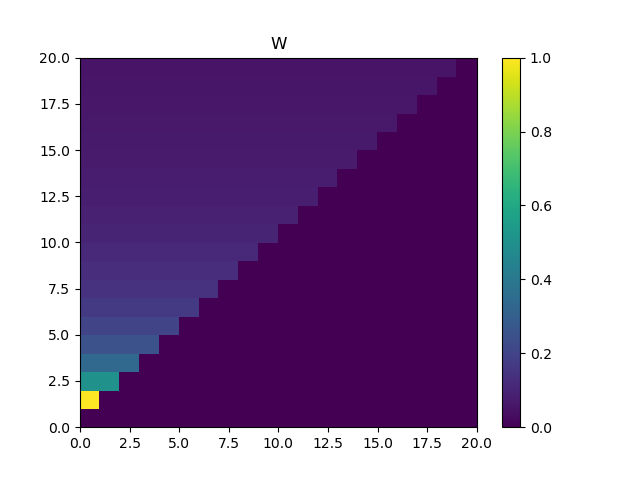

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4317748>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4317748>
DEBUG:matplotlib.colorbar:Setting pcolormesh
INFO:ompy.firstgeneration:iter 1/6: ε = 6.27628


<IPython.core.display.Javascript object>


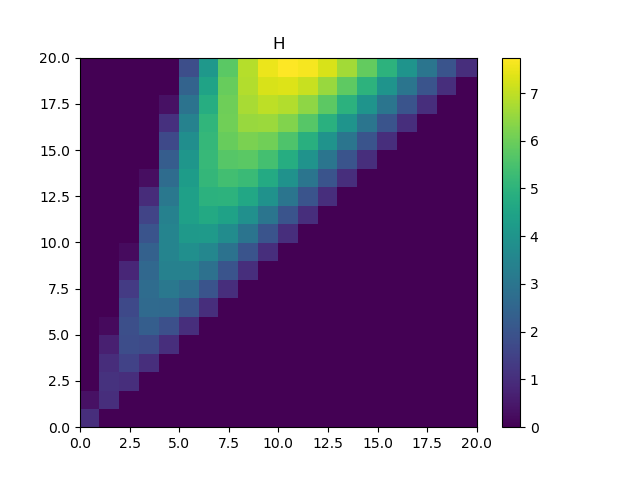

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4491588>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4491588>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


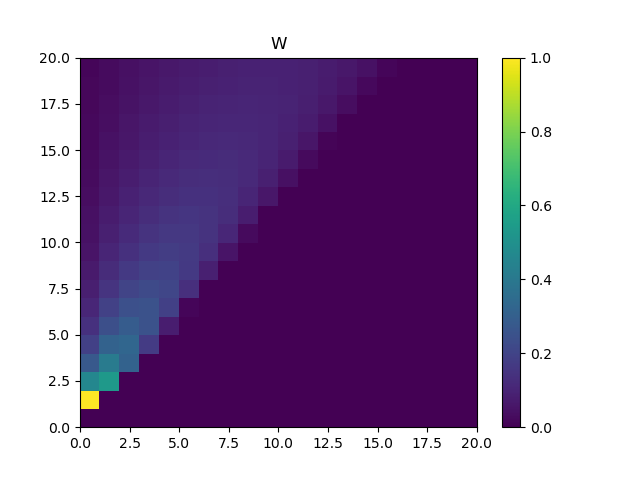

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4875240>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4875240>
DEBUG:matplotlib.colorbar:Setting pcolormesh
INFO:ompy.firstgeneration:iter 2/6: ε = 1.47445


<IPython.core.display.Javascript object>


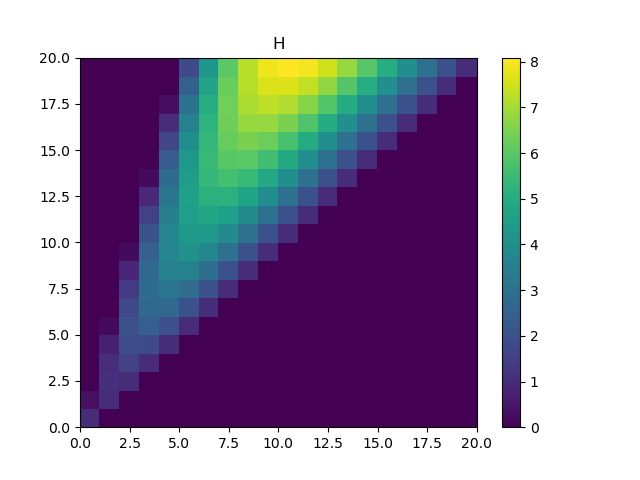

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f42e2b70>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f42e2b70>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


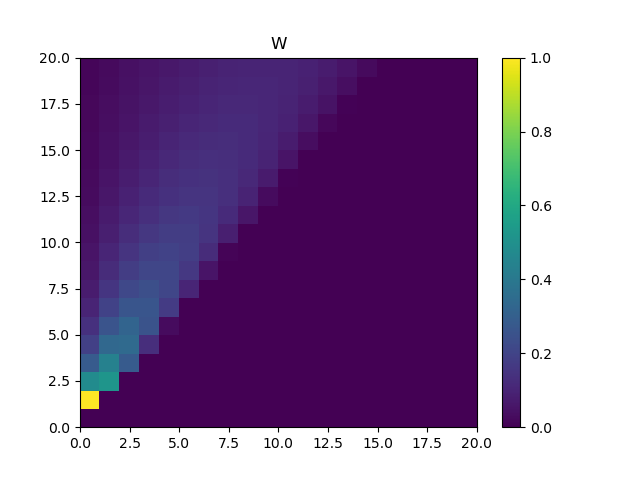

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4469a90>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4469a90>
DEBUG:matplotlib.colorbar:Setting pcolormesh
INFO:ompy.firstgeneration:iter 3/6: ε = 0.364074


<IPython.core.display.Javascript object>


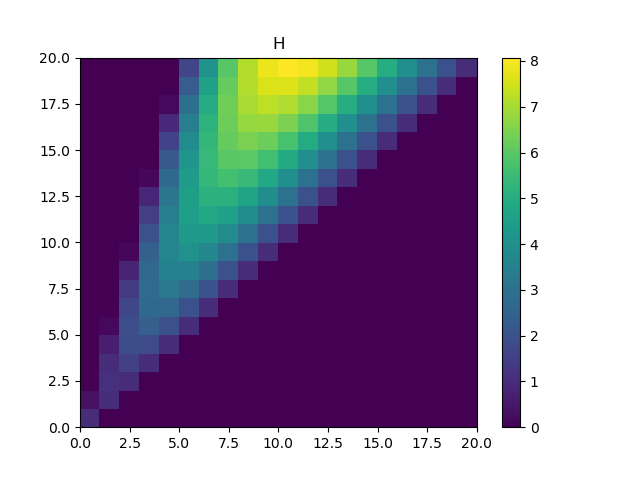

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f419c710>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f419c710>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


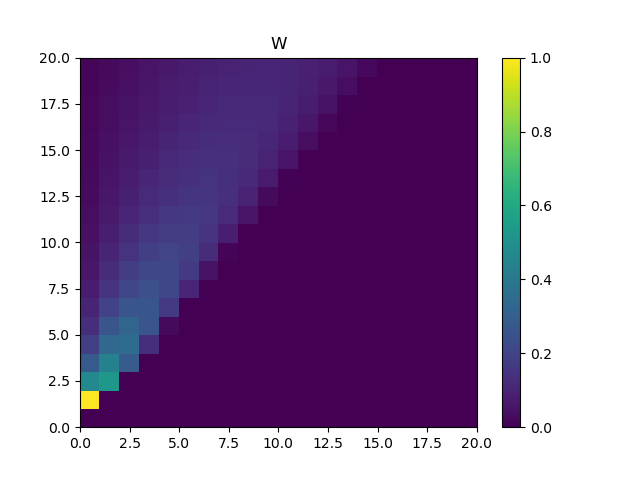

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f47c6400>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f47c6400>
DEBUG:matplotlib.colorbar:Setting pcolormesh
INFO:ompy.firstgeneration:iter 4/6: ε = 0.11143


<IPython.core.display.Javascript object>


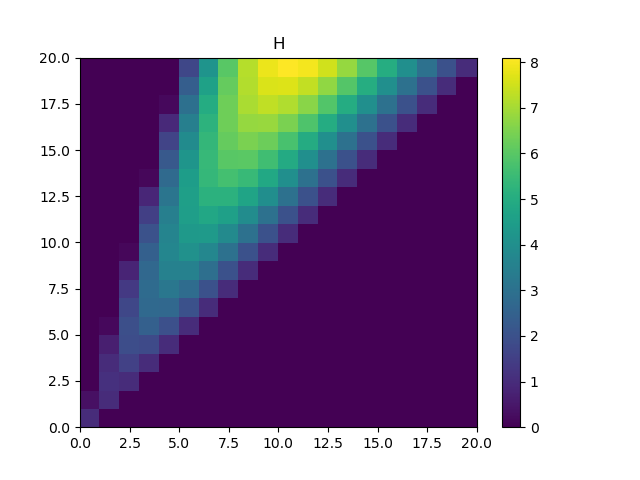

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4746048>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4746048>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


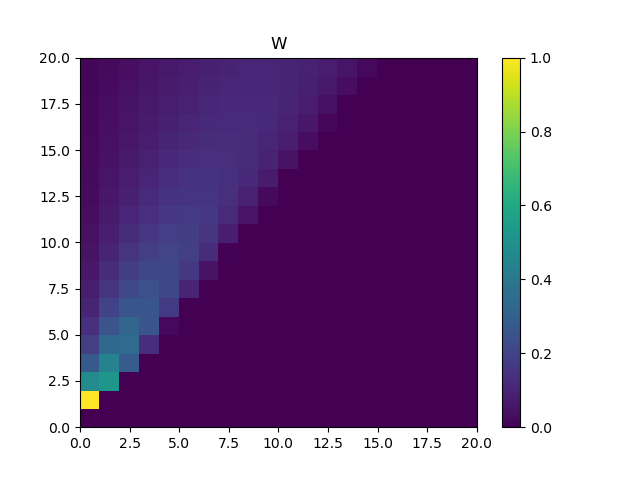

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4731a90>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4731a90>
DEBUG:matplotlib.colorbar:Setting pcolormesh
INFO:ompy.firstgeneration:iter 5/6: ε = 0.0339377


<IPython.core.display.Javascript object>


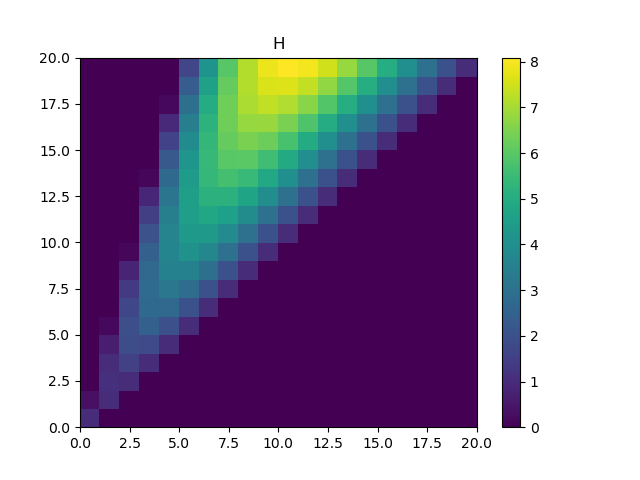

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f466b5c0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f466b5c0>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


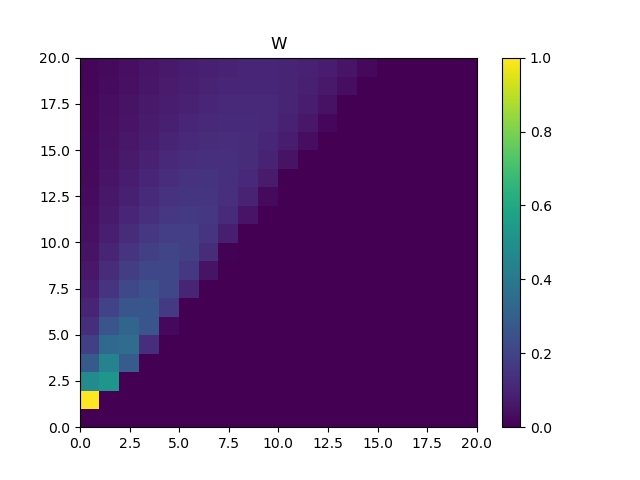

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f45ac080>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f45ac080>
DEBUG:matplotlib.colorbar:Setting pcolormesh
INFO:ompy.firstgeneration:iter 6/6: ε = 0.0130292


<IPython.core.display.Javascript object>


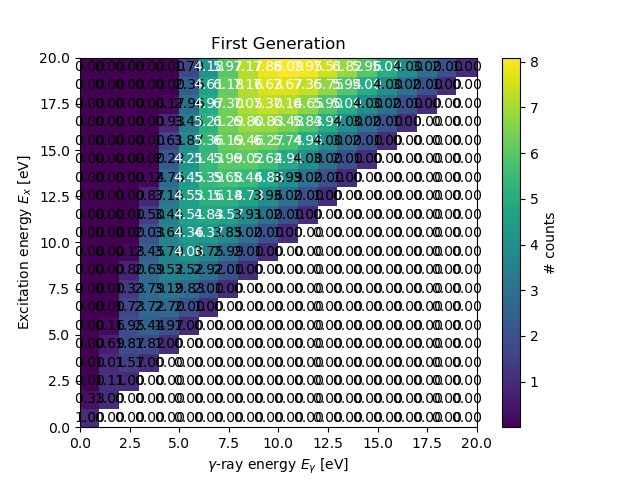

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4578b00>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4578b00>
DEBUG:matplotlib.colorbar:Setting pcolormesh


│░░░░░░░░░░░░▓▓████████████████▓▓▓▓▒▒▒▒░░
│░░░░░░░░░░▒▒▓▓██████████████▓▓▓▓▒▒░░░░  
│░░░░░░░░░░▒▒▓▓████████████▓▓▓▓▒▒░░░░    
│░░░░░░░░░░▒▒▓▓██████████▓▓▓▓▒▒░░░░      
│░░░░░░░░░░▓▓▓▓████████▓▓▓▓▒▒░░░░        
│░░░░░░░░▒▒▓▓▓▓██████▓▓▓▓▒▒░░░░          
│░░░░░░░░▒▒▓▓▓▓████▓▓▓▓▒▒░░░░            
│░░░░░░░░▒▒▓▓▓▓▓▓▓▓▓▓▒▒░░░░              
│░░░░░░░░▒▒▓▓▓▓▓▓▓▓▒▒░░░░                
│░░░░░░▒▒▒▒▓▓▓▓▒▒▒▒░░░░                  
│░░░░░░▒▒▒▒▓▓▒▒▒▒░░░░                    
│░░░░░░▒▒▒▒▒▒▒▒░░░░                      
│░░░░░░▒▒▒▒▒▒░░░░                        
│░░░░░░▒▒▒▒░░░░                          
│░░░░░░▒▒░░░░                            
│░░░░░░░░░░                              
│░░░░░░░░                                
│░░░░░░                                  
│░░░░                                    
│░░                                      
└────────────────────────────────────────


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19.])

In [142]:
import logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger("ompy.firstgen")
logger.setLevel(logging.DEBUG)

allg, fg = om.all_generations_trivial((20, 20), ret_firstgen=True)
#allg.Ex = np.linspace(0, 3*1000, 3)
#allg.Eg = np.linspace(0, 3000, 3)
#allg.plot()
Fg = om.FirstGeneration()
Fg.multiplicity_estimation = 'total'
Fg.num_iterations = 6
Fg.step = om.plot_hook(Fg.step)
#Fg.setup = om.plot_hook(Fg.setup)
fg_cand = Fg.apply(allg)
om.annotate_heatmap(fg_cand.plot()[0], fg_cand)
fg_cand.values
fg_cand.ascii_plot()
allg.Ex

<IPython.core.display.Javascript object>


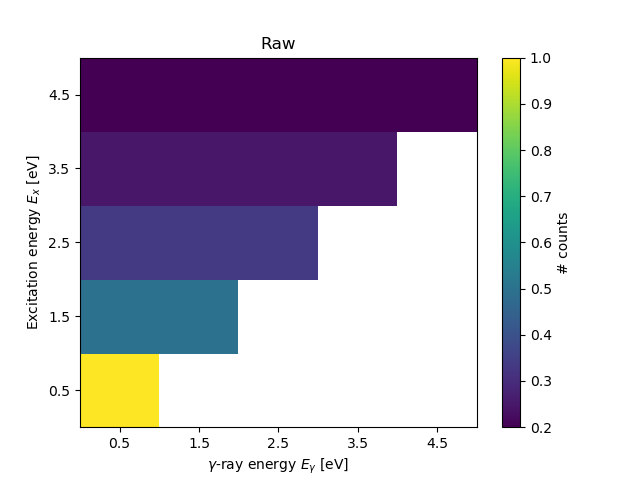

array([0.5, 0.5, 0. , 0. , 0. ])

In [100]:
firstgen = om.FirstGeneration()
mat = om.all_generations_trivial((5, 5))
rownorm = firstgen.row_normalized(mat)
om.Matrix(values=firstgen.row_normalized(mat)).plot()
rownorm[1, :]

DEBUG:ompy.firstgeneration:Multiplicites:
┌────────┬────────────────┐
│ Ex     │ Multiplicities │
╞════════╪════════════════╡
│ 500.0  │ 1.0            │
├────────┼────────────────┤
│ 1500.0 │ 1.5            │
├────────┼────────────────┤
│ 2500.0 │ 1.8            │
└────────┴────────────────┘


<IPython.core.display.Javascript object>


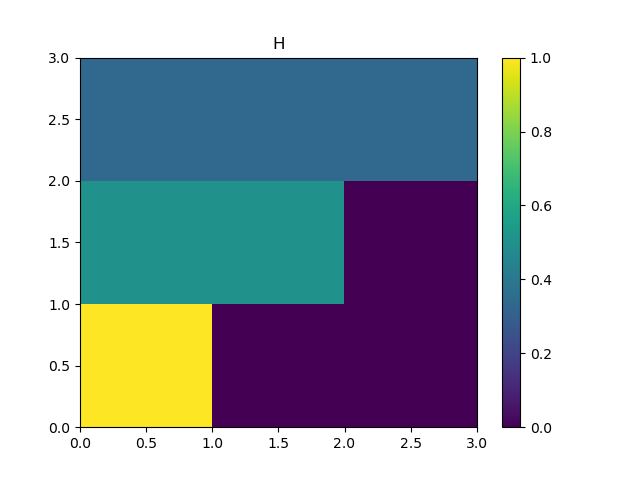

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f53b8a90>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f53b8a90>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


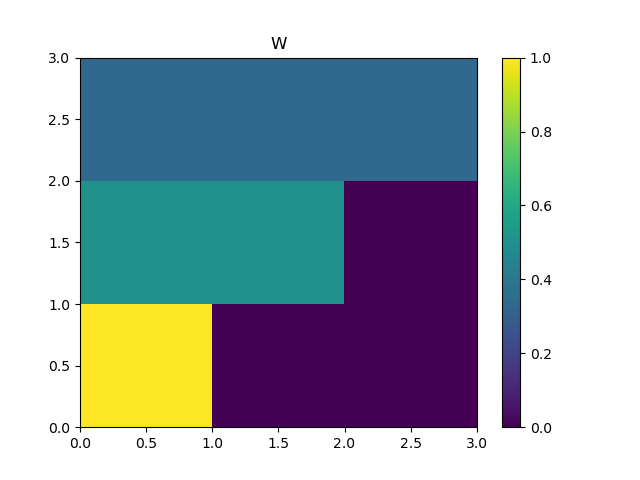

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4dcec18>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4dcec18>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


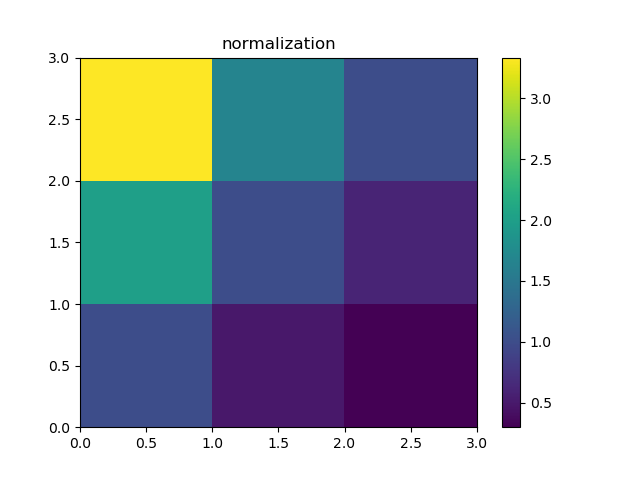

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f77c0a58>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f77c0a58>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


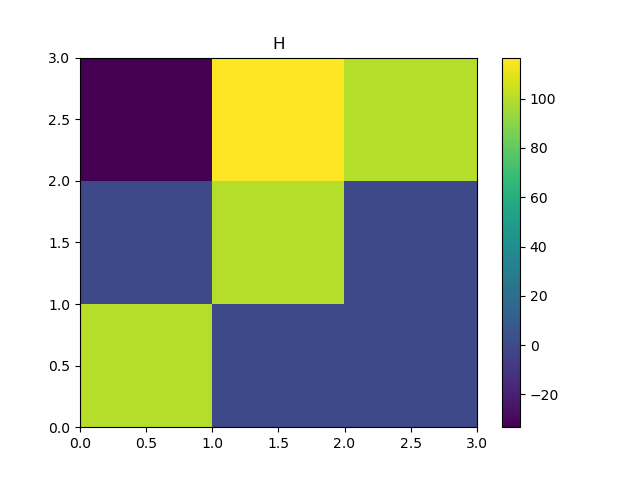

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f7347400>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f7347400>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


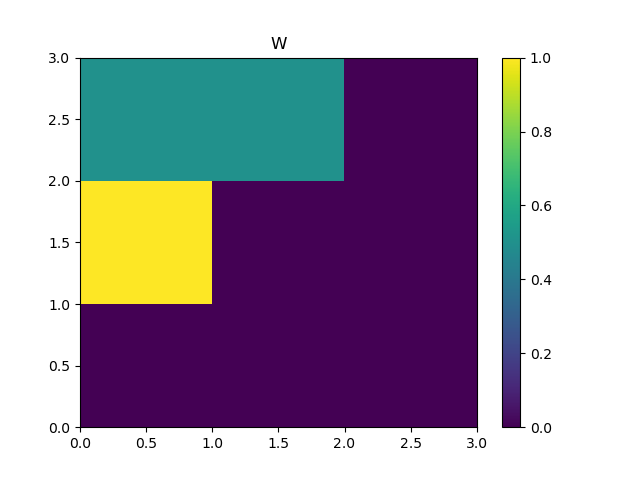

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f55acb38>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f55acb38>
DEBUG:matplotlib.colorbar:Setting pcolormesh
INFO:ompy.firstgeneration:iter 1/6: ε = 116.333


<IPython.core.display.Javascript object>


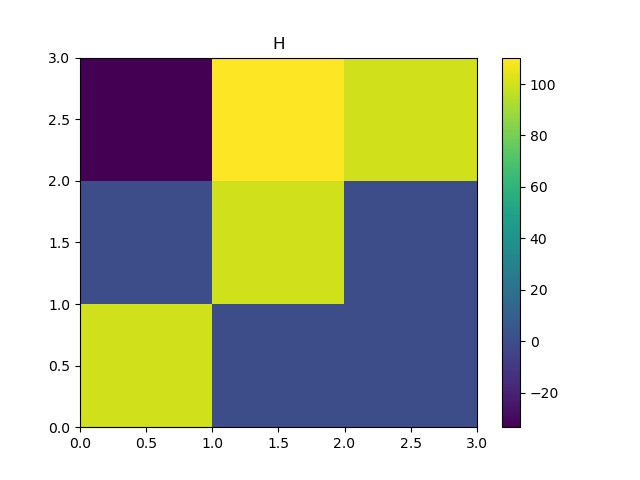

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f5091da0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f5091da0>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


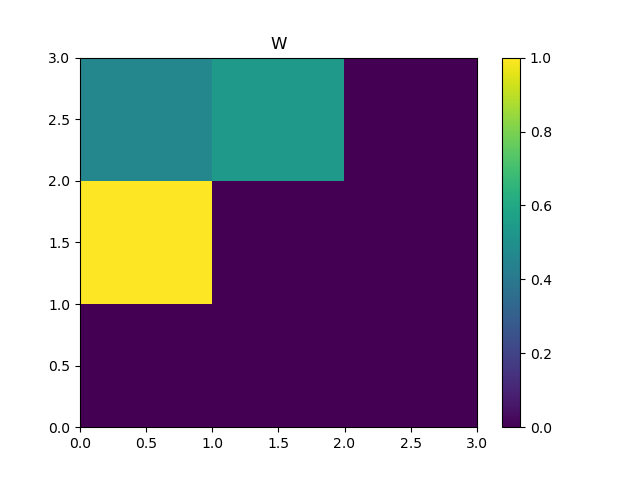

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f54d77f0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f54d77f0>
DEBUG:matplotlib.colorbar:Setting pcolormesh
INFO:ompy.firstgeneration:iter 2/6: ε = 6.41026


<IPython.core.display.Javascript object>


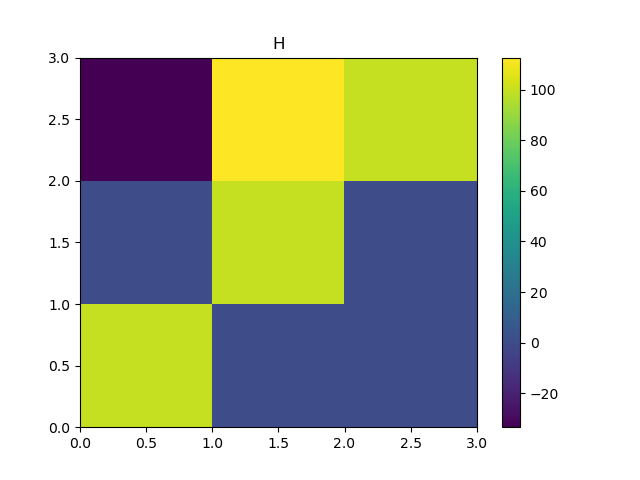

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4f33f28>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4f33f28>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


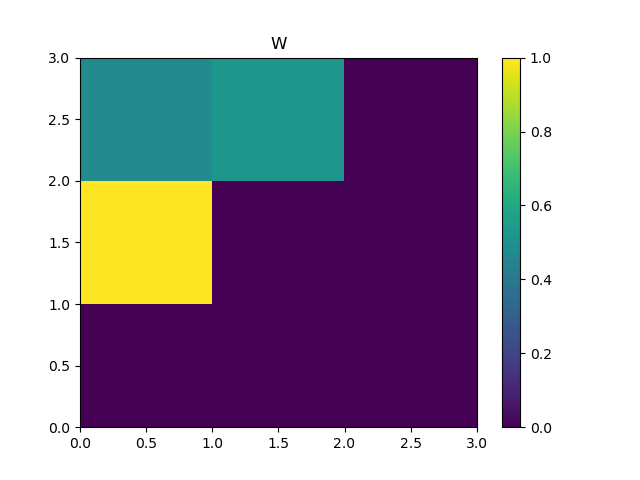

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f5545128>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f5545128>
DEBUG:matplotlib.colorbar:Setting pcolormesh
INFO:ompy.firstgeneration:iter 3/6: ε = 2.34522


<IPython.core.display.Javascript object>


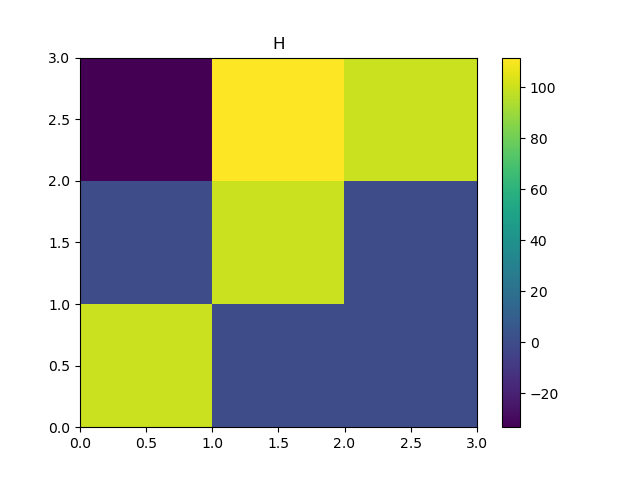

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f568ddd8>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f568ddd8>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


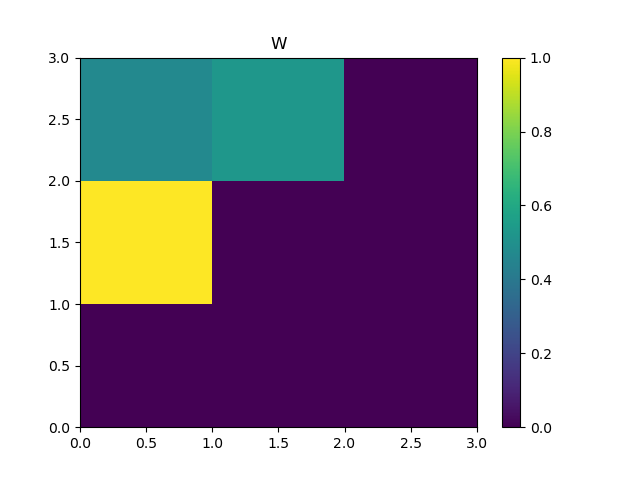

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f55f19b0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f55f19b0>
DEBUG:matplotlib.colorbar:Setting pcolormesh
INFO:ompy.firstgeneration:iter 4/6: ε = 0.874411


<IPython.core.display.Javascript object>


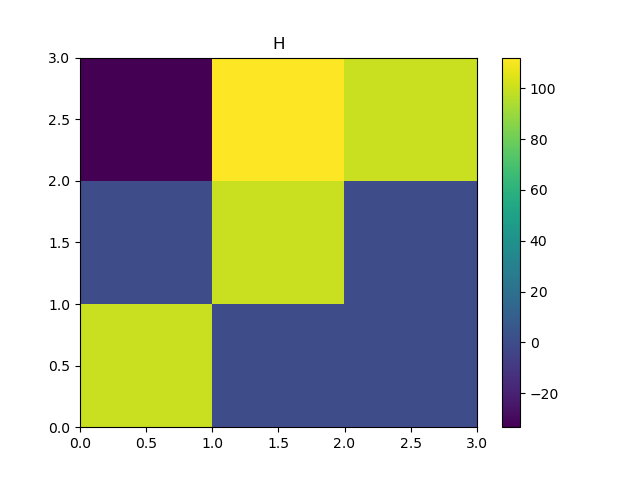

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f542f278>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f542f278>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


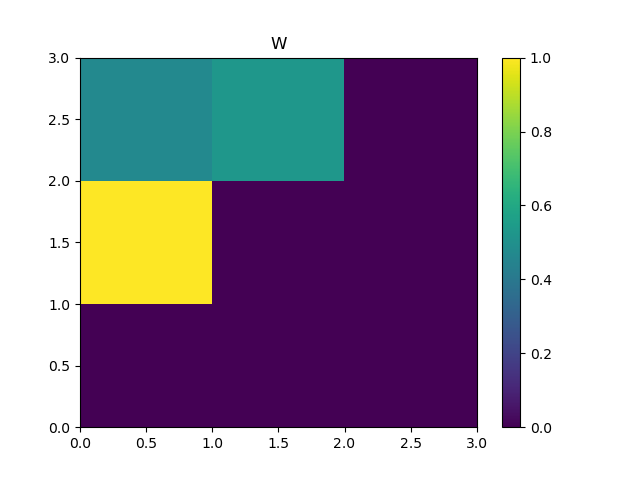

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f5401c18>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f5401c18>
DEBUG:matplotlib.colorbar:Setting pcolormesh
INFO:ompy.firstgeneration:iter 5/6: ε = 0.323759


<IPython.core.display.Javascript object>


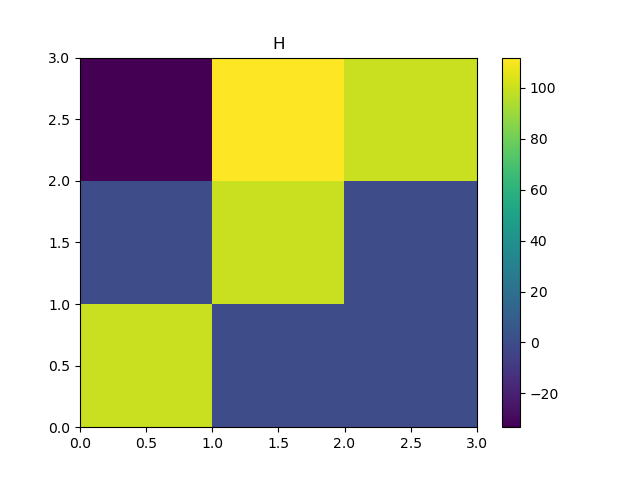

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4a98b38>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4a98b38>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


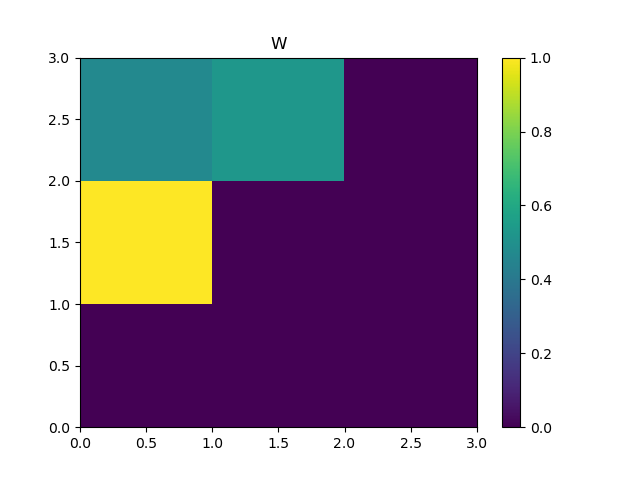

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4a169e8>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4a169e8>
DEBUG:matplotlib.colorbar:Setting pcolormesh
INFO:ompy.firstgeneration:iter 6/6: ε = 0.119943


<IPython.core.display.Javascript object>


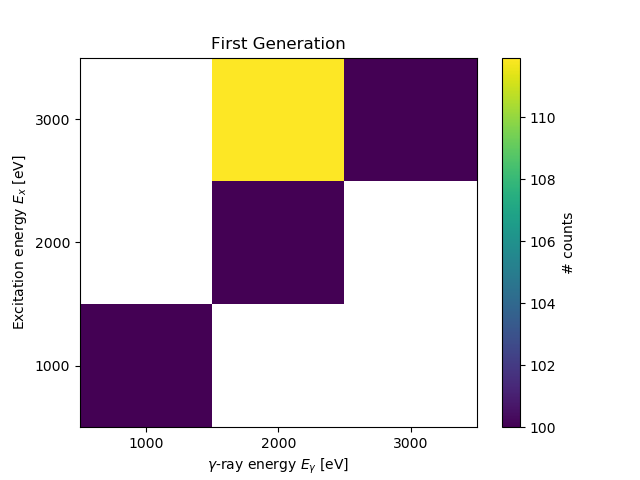

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4990a90>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4990a90>
DEBUG:matplotlib.colorbar:Setting pcolormesh


(<matplotlib.collections.QuadMesh at 0x7fe8f49d6a58>,
 <Figure size 640x480 with 2 Axes>)

In [139]:
mat = om.Matrix(filename='m.m')
Fg.step = om.plot_hook(Fg.step)
Fg.apply(mat).plot()

<IPython.core.display.Javascript object>


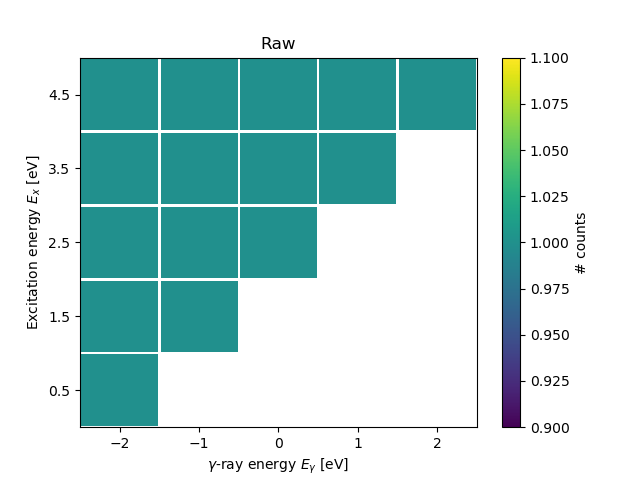

[[1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1.]]


<IPython.core.display.Javascript object>


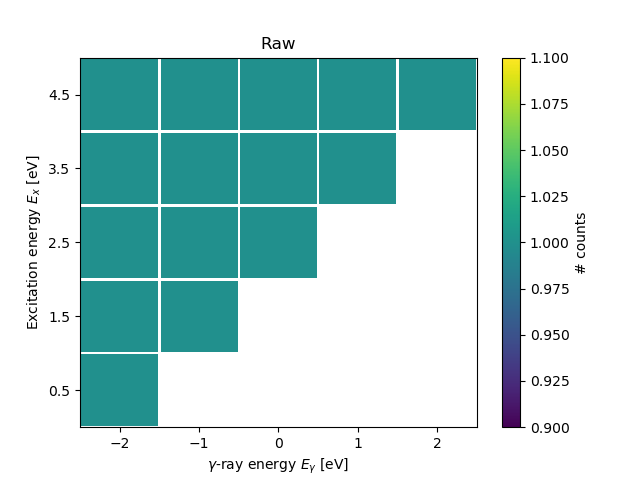

(<matplotlib.collections.QuadMesh at 0x7ffa44fff400>,
 <Figure size 640x480 with 2 Axes>)

In [55]:
mat = om.ones((5,5))
mat.Eg = np.linspace(-2, 2, 5)
mat.plot(edgecolor='white')
#mat.cut('Eg', Emin=0.2, Emax=0.2)
print(mat.values)
mat.plot(edgecolor='white')

<IPython.core.display.Javascript object>


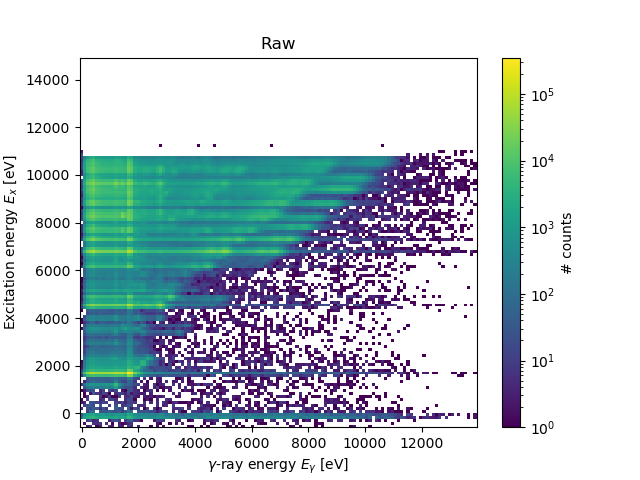

(<matplotlib.collections.QuadMesh at 0x7ffa45f7e4a8>,
 <Figure size 640x480 with 2 Axes>)

In [25]:
simat = om.load_example_raw('Si28')
simat.plot()